<a href="https://colab.research.google.com/github/adolfoguimaraes/teoriadosgrafos/blob/main/02_AlgoritmosDeBusca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de Busca 

Hora de implementar :) Vamos colocar em prática alguns conceitos vistos na aula de hoje. 

![letsgo](https://media.giphy.com/media/3o7TKUM3IgJBX2as9O/giphy.gif?cid=ecf05e47j54zjel0dct4y8tdsndabsayqffsmiiw1y5fmuua&rid=giphy.gif&ct=g)

Nosso ponto de partida são os algoritmos de busca vistos em sala de aula. Mas precisamente, o algoritmo de busca em Profundidade.

## Importação e métodos de apoio


Nesta seção ficarão os códigos para importação de bibliotecas e métodos auxiliares da implementação.

In [8]:
# importando a biblioteca 

import networkx as nx

# importação da biblioteca para plotagem de gráficos 
import matplotlib.pyplot as plt 

In [9]:
# Função em Python para facilitar a impressão do Grafo. 

def exibir_grafo(grafo):
  options = {
      'node_color': '#0080FF',
      'edge_color': '#808080',
      'node_size': 600,
      'width': 2,
      'font_color': 'white',
      'font_weight': 'bold',
      'font_size': 10

  }
  plt.figure(1)
  nx.draw_networkx(
      grafo, 
      pos=nx.spring_layout(grafo), 
      with_labels=True,
      **options
  )
  plt.show()

## Construindo o Grafo

Vamos construir um grafo de exemplo para que a gente possa aplicar os algoritmos de busca.

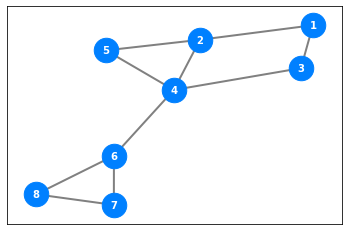

In [10]:

# Instanciando o objeto Grafo
G = nx.Graph()

# Adicionando os Vértices
G.add_nodes_from([1,2,3,4,5,6,7,8])

# Adicionando as Arestas
G.add_edges_from([
                  (1,2),(1,3),(2,4),(2,5),
                  (3,4),(4,5),(4,6),(6,7),(6,8),(7,8)
                  ])
                 

exibir_grafo(G)


## Algoritmo de busca em profundidade

![](https://media.giphy.com/media/JUh0yTz4h931K/giphy.gif?cid=ecf05e47mosqv1zv5fpyc5p9tozwl5x9mwthlxci08wf9yf9&rid=giphy.gif&ct=g)

Vamos implementar o algoritmo de busca em profundidade visto em sala de aula. A versão que a gente vai utilizar é a versão iterativa que está disponível nos slides. 

Segue o pseudo-código. 

```
procedimento DFS_iterativo(v: vertice)
  Inicializar P
  Marcar P como visitado
  Empilhar v em P

  Enquanto P não estiver vazio
    Enquanto existe um vértice w não visitado e adjacente o topo de P
      Marcar w como visitado
      Empilhar w em P

    Retirar o primeiro elemento de P
```

In [11]:
# Função que retorna um vértice adjacente não-visitado
# de um vértice passado como parâmetro

def get_no_visted_neighbors(graph_, node, v):
  neighbors_node = [x for x in list(nx.neighbors(graph_, node)) if x not in v]
  if len(neighbors_node) > 0: return neighbors_node[0]
  else: None

In [12]:
def dfs(graph):

  not_visited = list(graph.nodes())

  while len(not_visited) > 0:
    node_start = not_visited[0]
    visited, explored = dfs_interative(graph, node_start, not_visited)
    print("Visitados: %s" % visited)
    print("Explorados: %s" % explored)


In [13]:
def dfs_interative(graph, v, list_not_visited):

  stack_ = []
  visited_ = []
  explored_ = []

  stack_.append(v)
  visited_.append(v)
  list_not_visited.remove(v)

  while len(stack_) > 0:
    top_stack = stack_[-1]
    node_not_visited = get_no_visted_neighbors(graph, top_stack, visited_)
    if node_not_visited:
      stack_.append(node_not_visited)
      visited_.append(node_not_visited)
      list_not_visited.remove(node_not_visited)
    else:
      explored_.append(stack_.pop())

  return visited_, explored_


In [14]:
dfs(G)

Visitados: [1, 2, 4, 3, 5, 6, 7, 8]
Explorados: [3, 5, 8, 7, 6, 4, 2, 1]


# Trabalho Prático: Atividade 1 

Agora é sua vez de implementar:

![yess](https://media.giphy.com/media/ckeHl52mNtoq87veET/giphy.gif?cid=ecf05e47oubgly18e47iwppoo3mo3s3cx23pvz066tgkcvtw&rid=giphy.gif&ct=g)

Essa atividade consiste na primeira parte do trabalho prático da primeira unidade. Cada item deve ser implementado aqui no Notebook, utilizando a biblioteca NetworkX. 

**Atenção!!!**

![](https://media.giphy.com/media/flWn1Cyk9HcVIj9xWy/giphy.gif?cid=ecf05e47fy8evk0m8mlpbloho97k0l1sc8u8enwr7hwy25vy&rid=giphy.gif&ct=g)

Os métodos solicitados devem ser implementados pelos alunos. Ou seja, não pode utilizar a implementação disponível na biblioteca. No entanto, vocês utilizar métodos da biblioteca de forma auxiliar, desde que não seja o método que faz o que está sendo pedido.

Vamos começar ;) 


### 1. Implemente o método iterativo da busca em largura. Lembre que você deve usar uma fila para implementa-lo.


In [38]:
# Função que retorna um vértice adjacente não-visitado
# de um vértice passado como parâmetro

def get_no_visted_neighbors_bfs(graph_, node, v):
  neighbors_node = [x for x in list(nx.neighbors(graph_, node)) if x not in v]
  if len(neighbors_node) > 0: return neighbors_node
  else: None

In [42]:
def bfs_interative(graph, v, list_not_visited):

  queue_ = []
  visited_ = []
  explored_ = []

  queue_.append(v)
  visited_.append(v)
  list_not_visited.remove(v)

  while len(queue_) > 0:
    first_queue = queue_[0]
    nodes_not_visited = get_no_visted_neighbors_bfs(graph, first_queue, visited_)
    if nodes_not_visited:
      queue_.extend(nodes_not_visited)
      visited_.extend(nodes_not_visited)
      for temp_node in nodes_not_visited:
        list_not_visited.remove(temp_node)
    else:
      explored_.append(queue_.pop(0))

  return visited_, explored_


In [43]:
def bfs(graph):

  not_visited = list(graph.nodes())

  while len(not_visited) > 0:
    node_start = not_visited[0]
    visited, explored = bfs_interative(graph, node_start, not_visited)
    print("Visitados: %s" % visited)
    print("Explorados: %s" % explored)


In [44]:
bfs(G)

Visitados: [1, 2, 3, 4, 5, 6, 7, 8]
Explorados: [1, 2, 3, 4, 5, 6, 7, 8]


### 2. Crie um método ```eh_conexo``` que verifica se um grafo é conexo ou não. Utilze os métodos de busca em largura ou profundidade implementados para implementar este método. 

In [47]:
def eh_conexo(graph):

  not_visited = list(graph.nodes())

  while len(not_visited) > 0:
    node_start = not_visited[0]
    visited, explored = bfs_interative(graph, node_start, not_visited)
    
    if(set(visited) == set(graph.nodes())): return True 
    else: return False 


In [51]:
eh_conexo(G)

True

Criando um grafo para testar.

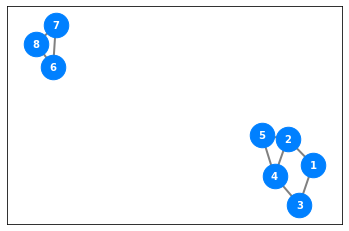

In [49]:

# Instanciando o objeto Grafo
G1 = nx.Graph()

# Adicionando os Vértices
G1.add_nodes_from([1,2,3,4,5,6,7,8])

# Adicionando as Arestas
G1.add_edges_from([
                  (1,2),(1,3),(2,4),(2,5),
                  (3,4),(4,5),(6,7),(6,8),(7,8)
                  ])
                 

exibir_grafo(G1)


In [50]:
eh_conexo(G1)

False

### 3. Modifique um dos algoritmos de busca de forma que ele faça a busca de um ponto a outro especificado. Se o caminho entre esses dois pontos existir, retorna a lista de vértices do caminho. Caso contrário, retorna ```None```.

In [80]:
def dfs_interative_path(graph, start, end, list_not_visited):

  stack_ = []
  visited_ = []
  explored_ = []

  stack_.append(start)
  visited_.append(start)
  list_not_visited.remove(start)

  while len(stack_) > 0:
    top_stack = stack_[-1]
    node_not_visited = get_no_visted_neighbors(graph, top_stack, visited_)
    if node_not_visited:
      
      stack_.append(node_not_visited)
      visited_.append(node_not_visited)
      list_not_visited.remove(node_not_visited)

      if node_not_visited == end:
        break
    else:
      stack_.pop()

  return stack_


In [83]:
teste_ = list(G.nodes())
dfs_interative_path(G, 1, 6, teste_)

[1, 2, 4, 6]

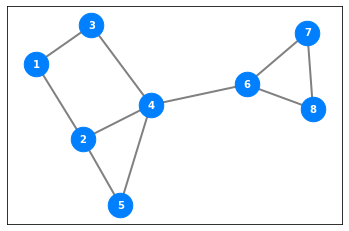

In [58]:
exibir_grafo(G)

### 4. Resolvendo o problema do labirinto

Sabia que podemos utilizar os métodos que você implementou até aqui para encontrar uma saída para um labirinto?

![](https://c.tenor.com/--Od5TdZ3KoAAAAM/essemenino-pfizer.gif)

É isso que vamos fazer agora. Considere o labirinto da imagem a seguir: 

![](https://wiki.data2learning.com/assets/disciplinas/iacc/modulo2/labirinto.png)

* Mapei o labirinto como um grafo.
* Construa o grafo utilizando a biblioteca NetworkX.
* Aplique o método desenvolvido no item 3 para encontrar o caminho que leva o robô do ponto que ele está até a saída do labirinto. A saída está identificada com o quadrado rosa. 


**Mapeamento** 

É fácil ver que os pontos em azul podem ser considerado os vértices e as arestas o caminho entre esses pontos. 

![](https://wiki.data2learning.com/assets/disciplinas/iacc/modulo2/labirinto_grafo2.jpg
)


Mapeando para no NetworkX, temos:

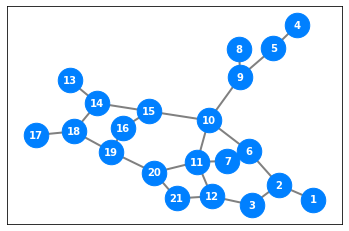

In [87]:

# Instanciando o objeto Grafo
GL = nx.Graph()

# Adicionando os Vértices
GL.add_nodes_from([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])

# Adicionando as Arestas
GL.add_edges_from([
                  (1,2),
                  (2,3),(2,6),
                   (3,12),
                   (4,5),
                   (5,9),
                   (6,7), (6,10),
                   (7,11),
                   (8,9),
                   (9,10),
                   (10,11),(10,15),
                   (11,12),(11,20),
                   (12,21),
                   (13,14),
                   (14,15),(14,18),
                   (15,16),
                   (16,19),
                   (17,18),
                   (18,19),
                   (19,20),
                   (20,21)


                  ])
                 

exibir_grafo(GL)


Agora é só aplicar o método criado anteriormente para obter o caminho.

In [88]:
all_nodes_L = list(GL.nodes())
dfs_interative_path(GL, 1, 17, all_nodes_L)

[1, 2, 3, 12, 11, 7, 6, 10, 15, 14, 18, 17]


![](https://media.giphy.com/media/obQ0Q8dav3L5S/giphy.gif?cid=ecf05e47uf6uxf8dsgt3dwldm5of26b0okrdnjcs3nfy28xa&rid=giphy.gif&ct=g)

**Boa atividade e divirta-se :)**